# 그래프 실습 문제집 (정답 포함)

이 노트북은 `graph_practice_dataset.csv` 데이터를 이용해 그래프 이론에서 다룬 시각화들을 모두 연습하도록 구성되었습니다.

포함 그래프 유형:
1. Line Plot (추세)
2. Bar Chart (범주 비교)
3. Grouped Bar (범주+세그먼트 비교)
4. Pie Chart (비율)
5. Histogram (분포)
6. Box Plot (이상치/중앙값)
7. Scatter Plot (상관관계)
8. Heatmap (행/열 매핑)
9. Twin Axis (서로 다른 단위)
10. Log Scale 시각화
11. 강조 색상 하이라이트
12. Annotation(주석)
13. 3C 원칙(명확성/일관성/맥락)

※ 먼저 아래 셀을 실행해 데이터프레임을 불러오세요.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/04_graph_practice_dataset.csv', encoding='cp949')
df['날짜'] = pd.to_datetime(df['날짜'])
df.head()

,날짜,지역,제품,매출,이익,고객수,카테고리
0,2024-01-31,서울,A,182,34.916660,930.986807,전자
1,2024-02-29,서울,A,131,21.843166,998.727403,전자
2,2024-03-31,서울,A,172,22.114619,1203.880436,전자
3,2024-04-30,서울,A,94,21.636703,491.932862,전자
4,2024-05-31,서울,A,186,20.698511,1835.592633,전자


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      144 non-null    datetime64[ns]
 1   지역      144 non-null    object        
 2   제품      144 non-null    object        
 3   매출      144 non-null    int64         
 4   이익      144 non-null    float64       
 5   고객수     144 non-null    float64       
 6   카테고리    144 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 8.0+ KB


## 문제 1️⃣: 월별 전체 매출 추세 (Line Plot)

- `날짜`별 총 `매출`을 선 그래프로 나타내세요.
- `marker='o'`, `linewidth=2`, `grid=True`를 적용하세요.
- 그래프 제목: `월별 매출 추이`

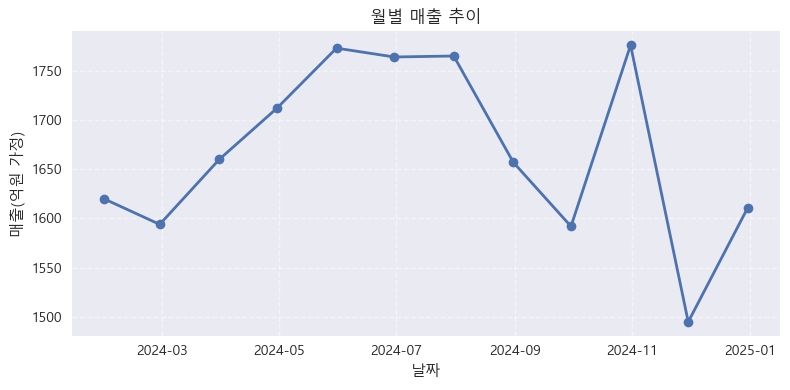

In [5]:
monthly_sales = df.groupby('날짜')['매출'].sum()

plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index, monthly_sales.values,
         marker='o', linewidth=2)
plt.title('월별 매출 추이')
plt.xlabel('날짜')
plt.ylabel('매출(억원 가정)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 문제 2️⃣: 지역별 매출 추세 비교

- 각 `지역`별로 월별 매출 합계를 구하고 한 그래프에 여러 선으로 그리세요.
- 범례(legend)를 추가하세요.
- 제목: `지역별 월별 매출 비교`

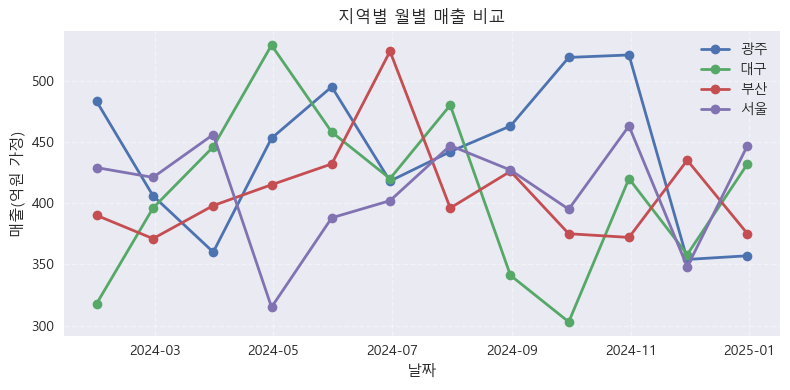

In [6]:
region_monthly = df.groupby(['날짜','지역'])['매출'].sum().unstack('지역')

plt.figure(figsize=(8,4))
for col in region_monthly.columns:
    plt.plot(region_monthly.index, region_monthly[col], marker='o', linewidth=2, label=col)
plt.title('지역별 월별 매출 비교')
plt.xlabel('날짜')
plt.ylabel('매출(억원 가정)')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 문제 3️⃣: 지역별 평균 매출 (Bar Chart)

- `지역`별 평균 `매출`을 막대 그래프로 나타내세요.
- x축: 지역 / y축: 평균 매출
- 제목: `지역별 평균 매출`

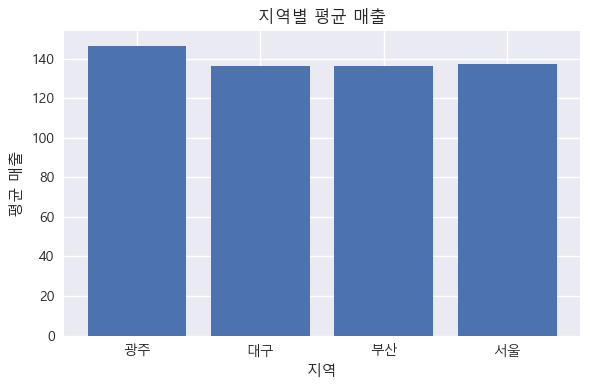

In [7]:
avg_sales_by_region = df.groupby('지역')['매출'].mean().reset_index()

plt.figure(figsize=(6,4))
plt.bar(avg_sales_by_region['지역'], avg_sales_by_region['매출'])
plt.title('지역별 평균 매출')
plt.xlabel('지역')
plt.ylabel('평균 매출')
plt.tight_layout()
plt.show()

## 문제 4️⃣: 지역 vs 제품별 매출 (Grouped Bar)

- x축에 지역을 두고, 제품을 `hue`(또는 막대 그룹)로 나누어 비교하세요.
- 지역 안에서 제품 A, B, C의 평균 매출 차이를 확인합니다.
- 제목: `지역별 제품 평균 매출 비교`

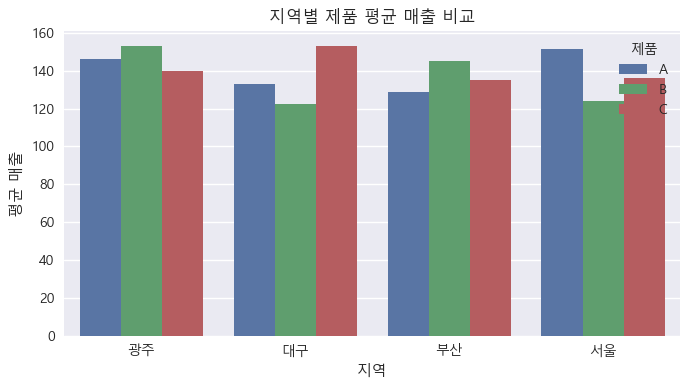

In [8]:
import seaborn as sns
avg_sales_region_product = df.groupby(['지역','제품'])['매출'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='지역', y='매출', hue='제품', data=avg_sales_region_product)
plt.title('지역별 제품 평균 매출 비교')
plt.xlabel('지역')
plt.ylabel('평균 매출')
plt.legend(title='제품', frameon=False)
plt.tight_layout()
plt.show()

## 문제 5️⃣: 제품별 총매출 비중 (Pie Chart)

- 전체 기간 동안 제품 A, B, C가 차지하는 총 매출 비율을 원형 그래프로 나타내세요.
- `autopct='%.1f%%'` 옵션을 사용하세요.
- 제목: `제품별 매출 비중`

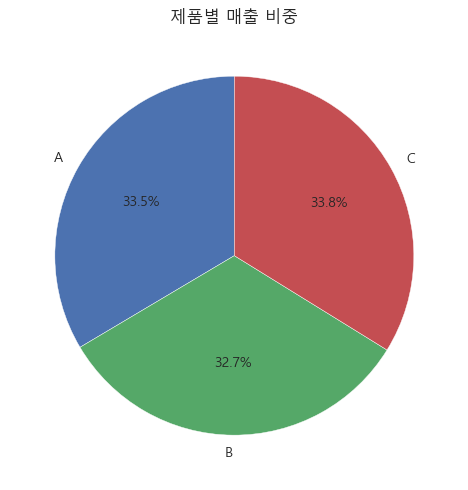

In [9]:
sales_by_product = df.groupby('제품')['매출'].sum()

plt.figure(figsize=(5,5))
plt.pie(sales_by_product.values,
        labels=sales_by_product.index,
        autopct='%.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white'})
plt.title('제품별 매출 비중')
plt.tight_layout()
plt.show()

## 문제 6️⃣: 이익 분포 (Histogram)

- 전체 행에 대해 `이익` 값의 분포를 히스토그램으로 그리세요.
- bin 개수는 15로 설정하세요.
- 제목: `이익 분포`

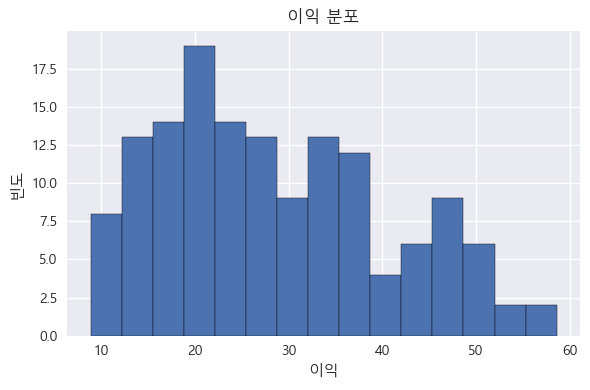

In [10]:
plt.figure(figsize=(6,4))
plt.hist(df['이익'], bins=15, edgecolor='black')
plt.title('이익 분포')
plt.xlabel('이익')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()

## 문제 7️⃣: 제품별 이익 분포 (Box Plot)

- 제품별 `이익` 분포를 박스플롯으로 표현하세요.
- 중앙값, 이상치 등을 비교합니다.
- 제목: `제품별 이익 분포`

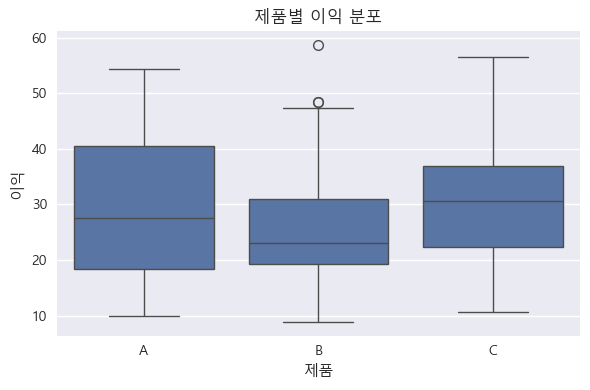

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='제품', y='이익', data=df)
plt.title('제품별 이익 분포')
plt.xlabel('제품')
plt.ylabel('이익')
plt.tight_layout()
plt.show()

## 문제 8️⃣: 매출 vs 이익 (Scatter Plot)

- x축: `매출`, y축: `이익` 산점도를 그리세요.
- 점 색깔은 `지역`에 따라 다르게 하세요.
- 제목: `매출과 이익의 관계`

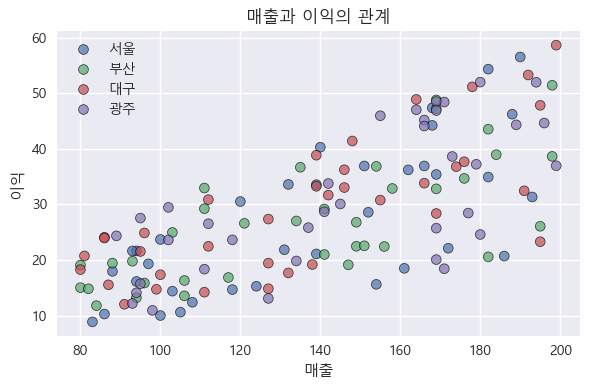

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='매출', y='이익', hue='지역', data=df,
                edgecolor='black', alpha=0.7)
plt.title('매출과 이익의 관계')
plt.xlabel('매출')
plt.ylabel('이익')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

## 문제 9️⃣: 지역 × 제품 매출 Heatmap

- `지역`(행)과 `제품`(열)을 기준으로 평균 `매출` pivot_table을 만드세요.
- 그 결과를 heatmap으로 시각화하세요.
- 제목: `지역-제품 평균 매출 히트맵`

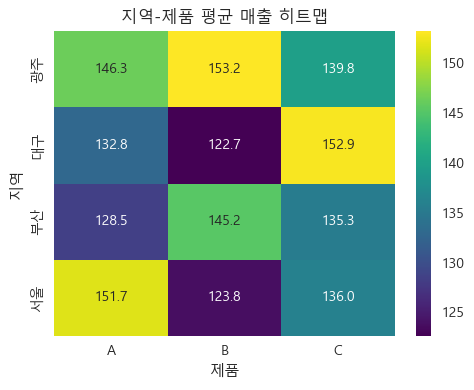

In [13]:
pivot_df = df.pivot_table(index='지역', columns='제품', values='매출', aggfunc='mean')

plt.figure(figsize=(5,4))
sns.heatmap(pivot_df, annot=True, fmt='.1f', cmap='viridis')
plt.title('지역-제품 평균 매출 히트맵')
plt.ylabel('지역')
plt.xlabel('제품')
plt.tight_layout()
plt.show()

## 문제 🔟: 매출 vs 고객수 (Twin Axis)

- x축은 `날짜`.
- 왼쪽 y축: 월별 총 매출 (막대그래프)
- 오른쪽 y축: 월별 총 고객수 (선 그래프)
- 제목: `월별 매출과 고객 수 추이`
- 힌트: `ax1.twinx()`

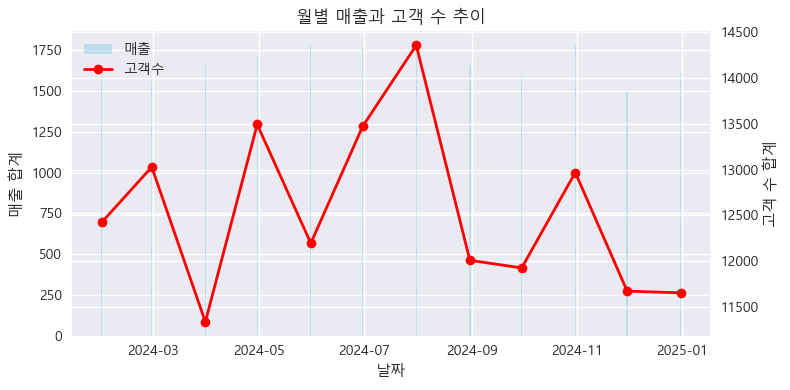

In [14]:
monthly = df.groupby('날짜').agg({'매출':'sum','고객수':'sum'})

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.bar(monthly.index, monthly['매출'], color='lightblue', alpha=0.7, label='매출')
ax1.set_xlabel('날짜')
ax1.set_ylabel('매출 합계')

ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly['고객수'], color='red', marker='o', linewidth=2, label='고객수')
ax2.set_ylabel('고객 수 합계')

plt.title('월별 매출과 고객 수 추이')

# 범례 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

## 문제 1️⃣1️⃣: 로그 스케일 시각화

- 어떤 제품-지역 조합의 `고객수`는 다른 조합보다 훨씬 클 수 있습니다.
- `고객수` 평균을 제품별로 집계한 후 막대그래프를 그리고,
  같은 데이터를 y축을 로그 스케일(`plt.yscale('log')`)로도 시각화하세요.
- 제목: `제품별 평균 고객 수 (일반 축)` / `제품별 평균 고객 수 (로그 축)`

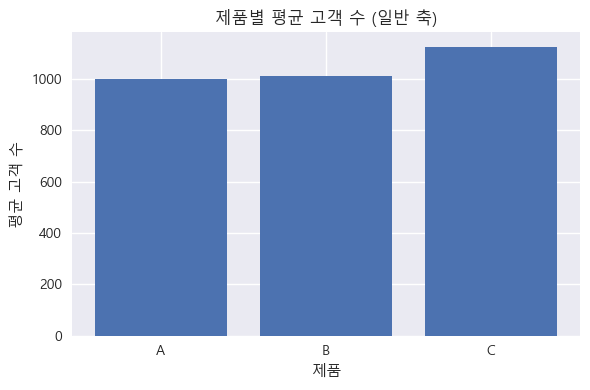

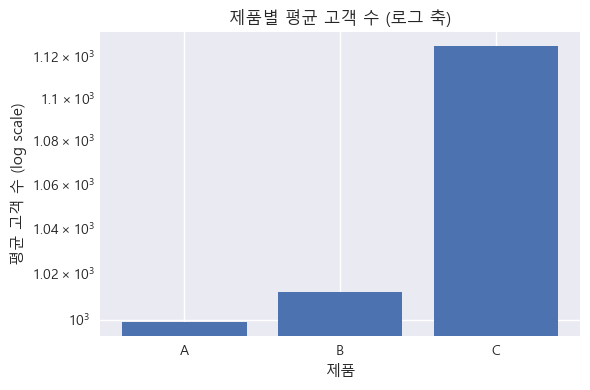

In [15]:
avg_customers_product = df.groupby('제품')['고객수'].mean()
x = np.arange(len(avg_customers_product))
labels = avg_customers_product.index
vals = avg_customers_product.values

# 일반 축
plt.figure(figsize=(6,4))
plt.bar(x, vals)
plt.xticks(x, labels)
plt.title('제품별 평균 고객 수 (일반 축)')
plt.xlabel('제품')
plt.ylabel('평균 고객 수')
plt.tight_layout()
plt.show()

# 로그 축
plt.figure(figsize=(6,4))
plt.bar(x, vals)
plt.xticks(x, labels)
plt.yscale('log')
plt.title('제품별 평균 고객 수 (로그 축)')
plt.xlabel('제품')
plt.ylabel('평균 고객 수 (log scale)')
plt.tight_layout()
plt.show()

## 문제 1️⃣2️⃣: 이상치 강조 (색상 강조)

- 월별 총 매출을 막대그래프로 그리되,
  평균보다 높은 달은 빨간색, 낮은 달은 파란색으로 칠하세요.
- 제목: `월별 매출 (평균 대비 강조)`

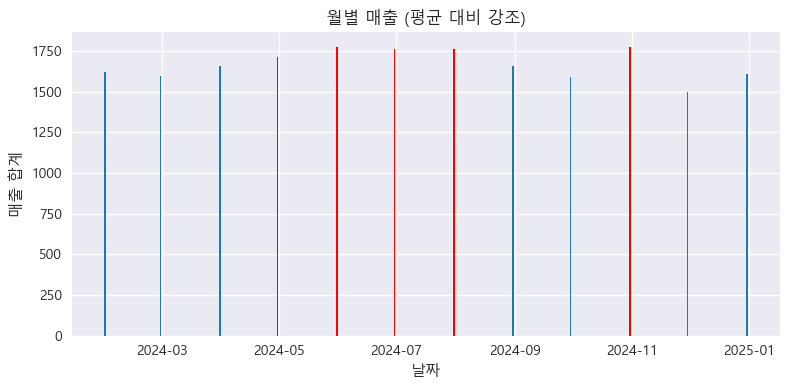

In [16]:
monthly_sales = df.groupby('날짜')['매출'].sum()
avg_val = monthly_sales.mean()
colors = ['red' if v > avg_val else 'tab:blue' for v in monthly_sales]

plt.figure(figsize=(8,4))
plt.bar(monthly_sales.index, monthly_sales.values, color=colors)
plt.title('월별 매출 (평균 대비 강조)')
plt.xlabel('날짜')
plt.ylabel('매출 합계')
plt.tight_layout()
plt.show()

## 문제 1️⃣3️⃣: 주석(Annotation)으로 포인트 강조

- 월별 총 고객수를 선 그래프로 나타내세요.
- 가장 큰 값을 찍은 달에 화살표와 텍스트로 `고객 급증`이라고 표시하세요.
- 제목: `월별 고객 수 추이`

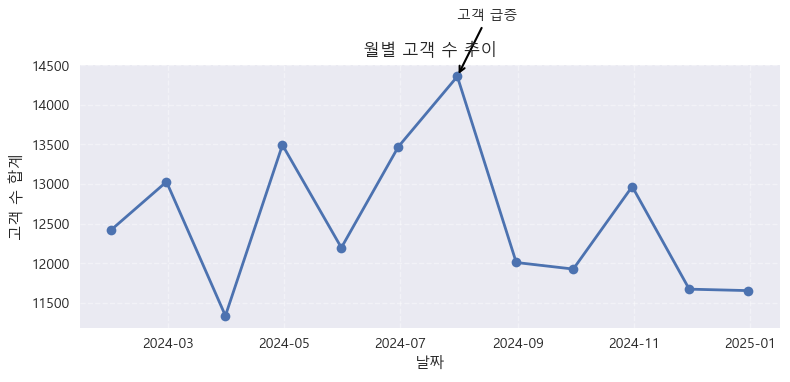

In [17]:
monthly_customers = df.groupby('날짜')['고객수'].sum()
peak_idx = monthly_customers.idxmax()
peak_val = monthly_customers.max()

plt.figure(figsize=(8,4))
plt.plot(monthly_customers.index, monthly_customers.values, marker='o', linewidth=2)
plt.title('월별 고객 수 추이')
plt.xlabel('날짜')
plt.ylabel('고객 수 합계')
plt.grid(True, linestyle='--', alpha=0.4)

plt.annotate('고객 급증',
             xy=(peak_idx, peak_val),
             xytext=(peak_idx, peak_val*1.05),
             arrowprops=dict(arrowstyle='->', lw=1.5))

plt.tight_layout()
plt.show()

## 문제 1️⃣4️⃣: 3C 원칙 (Clarity / Consistency / Context)

- `카테고리`별 총 매출을 막대그래프로 나타내세요.
- 그래프에 아래 사항을 모두 반영하세요:
  - 제목에 기간(2024년)과 단위(매출 합계)를 명시할 것
  - x축/y축 라벨 추가
  - grid는 약하게 표시 (`alpha=0.3`)
  - legend는 숨기거나 frameon=False 로 처리해 시각적 노이즈 최소화
- 제목 예시: `2024년 카테고리별 매출 합계 (단위: 임의 금액)`

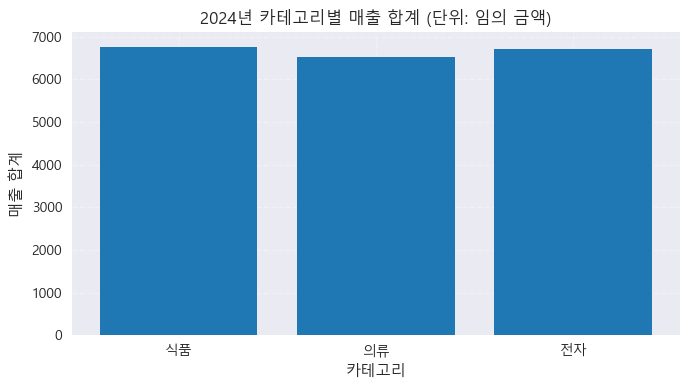

In [18]:
sales_by_cat = df.groupby('카테고리')['매출'].sum()
cats = sales_by_cat.index
vals = sales_by_cat.values

plt.figure(figsize=(7,4))
plt.bar(cats, vals, color='tab:blue')
plt.title('2024년 카테고리별 매출 합계 (단위: 임의 금액)', fontsize=12)
plt.xlabel('카테고리')
plt.ylabel('매출 합계')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()